In [1]:
from size_based_ecosystem import *
#import imageio as imgio
from mpl_toolkits.axes_grid1 import ImageGrid
from utility_functions import *

In [2]:
!pip install imageio

In [3]:
new_spectral = spectral_method(30, 200)

In [4]:
def expander(old_spectral, new_spectral, transform_vec):
    length = old_spectral.x[-1]
    coeffs = np.linalg.inv(old.spectral.JacobiP_n(2*old_spectral.x/length - 1, 0, 0, old_spectral.n).T) @ transform_vec
    transformer = new_spectral.JacobiP_n(2*new_spectral.x/new_spectral.x[-1] - 1, 0, 0, old_spectral.n).T
    return transformer @ coeffs

In [5]:
solar_levels = solar_input_calculator()

In [6]:
def interpolater(spectral, new_points, transform_vec):
    length = spectral.x[-1]
    coeffs = np.linalg.inv(spectral.JacobiP_n(2*spectral.x/length - 1, 0, 0, spectral.n).T) @ transform_vec
    transformer = spectral.JacobiP_n(2*new_points/new_points[-1] - 1, 0, 0, spectral.n).T
    return transformer @ coeffs

In [7]:
import matplotlib.pyplot as plt
import pickle as pkl
import imageio as imageio
frames_path = "images/images" + "{i}.jpg"
gif_path = "images/test_gif.gif"

In [8]:
def data_extractor(filenames, path = 'data/'):
    strategies = []
    populations = []
    eco = []
    resources = []
    for text in filenames:
        with open(path + 'strategies' + text + '.pkl', 'rb') as f:
            strategies.append(np.array(pkl.load(f)))
        with open(path + 'population' + text + '.pkl', 'rb') as f:
            populations.append(np.array(pkl.load(f)))
        with open(path + 'eco' + text + '.pkl', 'rb') as f:
            eco.append( pkl.load(f))
        with open(path + 'resource' + text + '.pkl', 'rb') as f:
            resources.append(np.array(pkl.load(f)))
    populations[0] = np.array(populations[0])
    populations[1] = np.array(populations[1])
    populations[2] = np.array(populations[2])

    strategies[0] = np.array(strategies[0])
    strategies[1] = np.array(strategies[1])
    strategies[2] = np.array(strategies[2])
    
    
    resources[0] = np.array(resources[0])
    resources[1] = np.array(resources[1])
    resources[2] = np.array(resources[2])
    return strategies, populations, resources, eco


In [9]:
filenames = ['non_random_oresund', 'more_random_oresund', 'completely_random_oresund']

In [10]:
strategies, populations, resources, ecos = data_extractor(filenames)

In [11]:
interpolated = interpolater(ecos[0].spectral, np.linspace(0,45,100), strategies[0][13000][0]@ecos[0].heat_kernels[0])

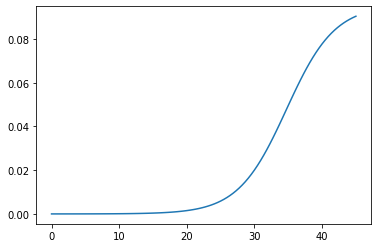

In [12]:
plt.plot(np.linspace(0,45,100),interpolated)

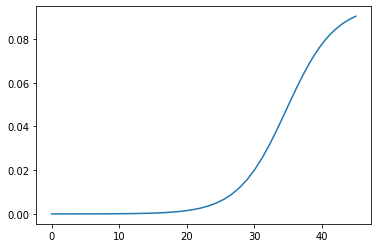

In [13]:
plt.plot(ecos[0].spectral.x, strategies[0][13000][0]@ecos[0].heat_kernels[0])

In [14]:

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120), 
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150), 
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148), 
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199), 
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)



In [15]:
def heatmap_plotter(data, image_name, ext):
    fig = plt.figure(figsize=(16/2.54, 16/2.54))

    grid = ImageGrid(fig, 111,  # as in plt.subplot(111)
                     nrows_ncols=(1, len(data)),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="5%",
                     cbar_pad=0.05,
                     )

    # Add data to image grid
    i = 0
    for ax in grid:
        im = ax.imshow(data[i], vmin=0, cmap='seismic', extent=ext)
        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        ax.set_aspect((x1 - x0) / (y1 - y0))
        ax.set_xlabel("Time (Hours)")
        ax.set_ylabel("Depth (m)")

        i += 1

    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    #plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible

    #fig.colorbar(im, cax=cax)

    plt.savefig(image_name+".pdf", bbox_inches='tight')

def bigge_heatmap_plotter(day, eco, strategy_data, fineness = 100, filename = None):
    day_interval = 96
    day = int(day*day_interval)
    new_vec = np.linspace(0,45,fineness)
    HM_C = np.zeros((fineness, 96))
    HM_P = np.zeros((fineness, 96))
    for i in range(day,day+day_interval):
        HM_C[:, i-(day)] = interpolater(eco.spectral, new_vec, strategy_data[i][0]@eco.heat_kernels[0])
        HM_P[:, i-(day)] = interpolater(eco.spectral, new_vec, strategy_data[i][1]@eco.heat_kernels[0])
    heatmap_plotter([HM_C, HM_P], "heatmaps" + filename , [-12, 12, -100, 0])


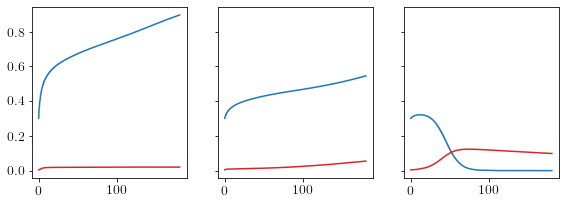

In [16]:
time = np.linspace(0, 180, populations[0].shape[0])

fig, ax = plt.subplots(1, 3, sharex='col', sharey = 'row')
fig.set_size_inches((24/2.54, 8/2.54))

ax[0].plot(time, np.log10(1+populations[0][:,0]), color = tableau20[0], label = '20g fish')
ax[0].plot(time, np.log10(1+populations[0][:,1]), color = tableau20[6], label = '8000g fish')

ax[1].plot(time, np.log10(1+populations[1][:,0]), color = tableau20[0], label = '20g fish')
ax[1].plot(time, np.log10(1+populations[1][:,1]), color = tableau20[6], label = '8000g fish')

ax[2].plot(time, np.log10(1+populations[2][:,0]), color = tableau20[0], label = '20g fish')
ax[2].plot(time, np.log10(1+populations[2][:,1]), color = tableau20[6], label = '8000g fish')

plt.savefig("populations.pdf")

In [17]:
purple = 0.2*np.array(tableau20[6])+0.8*np.array(tableau20[0])
purp = (purple[0], purple[1], purple[2])

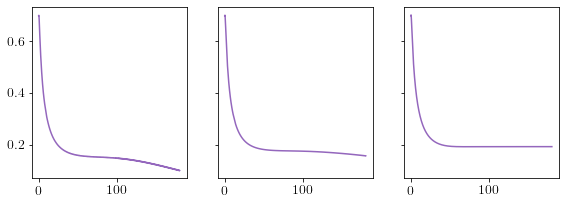

In [18]:
time = np.linspace(0, 180, populations[0].shape[0])

fig, ax = plt.subplots(1, 3, sharex='col', sharey = 'row')
fig.set_size_inches((24/2.54, 8/2.54))

ax[0].plot(time, np.log10(1+ecos[0].spectral.M.sum(axis = 1) @ resources[0].T), color = tableau20[8])
ax[1].plot(time, np.log10(1+ecos[0].spectral.M.sum(axis = 1) @ resources[1].T), color = tableau20[8])
ax[2].plot(time, np.log10(1+ecos[0].spectral.M.sum(axis = 1) @ resources[2].T), color = tableau20[8])
plt.savefig("resources.pdf")

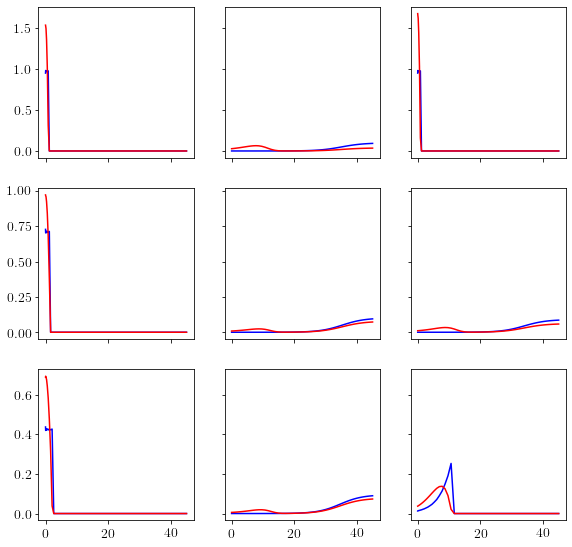

<Figure size 288x288 with 0 Axes>

In [19]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey = 'row')
fig.set_size_inches((24/2.54, 24/2.54))

day = 10
i = day*96
plt.figure(figsize=(4,4))
ax[0,0].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[0,0].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')

i = day*96+48

ax[0,1].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[0,1].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


i = day*96+84

ax[0,2].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[0,2].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


day = 90

i = day*96

ax[1,0].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[1,0].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')

i = day*96+48

ax[1,1].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[1,1].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


i = day*96+75

ax[1,2].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[1,2].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


day = 180

i = day*96

ax[2,0].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[2,0].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')

i = day*96+48

ax[2,1].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[2,1].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


i = day*96+75

ax[2,2].plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
ax[2,2].plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')



plt.savefig("mess_distributions.pdf")

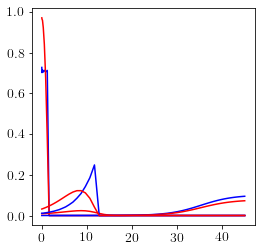

In [20]:
day = 90
i = day*96
plt.figure(figsize=(4,4))
plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')

i = day*96+48

plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


i = day*96+86

plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


plt.savefig("mess_distributions.pdf")

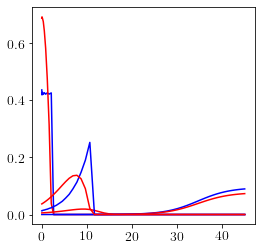

In [47]:
day = 180
i = day*96
plt.figure(figsize=(4,4))
plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')

i = day*96+48

plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')

i = day*96+75

plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')



plt.savefig("mess_distributions.pdf")

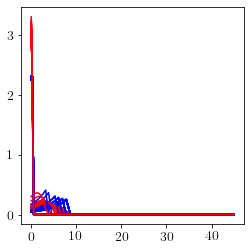

<Figure size 432x288 with 0 Axes>

In [22]:

day = 180
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, strategies[0][i][0]@ecos[0].heat_kernels[0], color = 'blue')
    plt.plot(ecos[0].spectral.x, strategies[0][i][1]@ecos[0].heat_kernels[0], color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

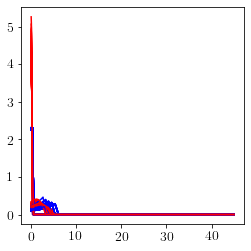

<Figure size 432x288 with 0 Axes>

In [23]:
day = 30
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
    plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

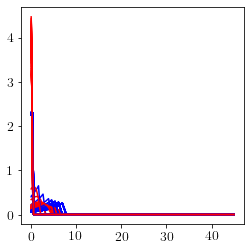

<Figure size 432x288 with 0 Axes>

In [24]:
day = 90
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
    plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

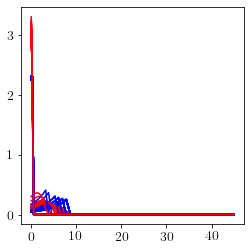

<Figure size 432x288 with 0 Axes>

In [25]:
day = 180
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')
    plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

In [26]:
#ecos[1].heat_kernel_creator(1/8*10**(-1))

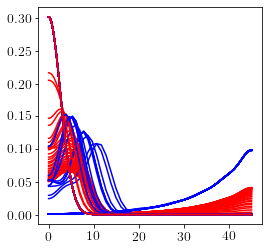

<Figure size 432x288 with 0 Axes>

In [27]:
day = 180
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, (strategies[1][i][0]@ecos[1].heat_kernels[0]), color = 'blue')
    plt.plot(ecos[0].spectral.x, (strategies[1][i][1]@ecos[1].heat_kernels[0]), color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

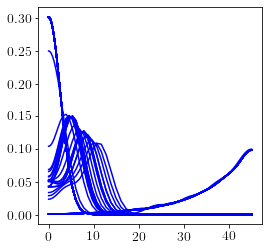

<Figure size 432x288 with 0 Axes>

In [28]:
day = 90
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, (strategies[1][i][0]@ecos[1].heat_kernels[0]), color = 'blue')
    #plt.plot(ecos[0].spectral.x, (strategies[1][i][1]@ecos[1].heat_kernels[0]), color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

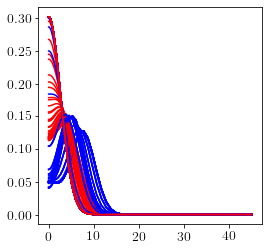

<Figure size 432x288 with 0 Axes>

In [29]:
day = 30
plt.figure(figsize=(4,4))
for i in range(day,day+96):
    plt.plot(ecos[0].spectral.x, (strategies[1][i][0]@ecos[1].heat_kernels[0]), color = 'blue')
    plt.plot(ecos[0].spectral.x, (strategies[1][i][1]@ecos[1].heat_kernels[0]), color = 'red')
plt.show()
plt.savefig("mess_distributions.pdf")

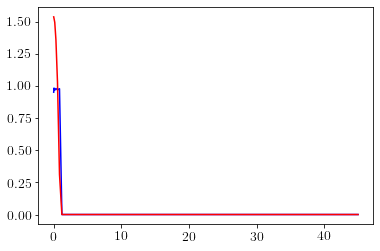

In [30]:
i = 960
plt.plot(ecos[0].spectral.x, (strategies[0][i][0]@ecos[0].heat_kernels[0]), color = 'blue')

plt.plot(ecos[0].spectral.x, (strategies[0][i][1]@ecos[0].heat_kernels[0]), color = 'red')


In [31]:
#strategies[i][0]@eco.heat_kernels[0] @ eco.spectral.M @ (eco.parameters.layered_attack[:,1,0] * strategies[i][1]@eco.heat_kernels[0])

In [32]:
#cumsum = np.block([[np.zeros(eco.layers)], [np.tril((np.ones((eco.layers, eco.layers))))]])
#diff = np.identity(eco.layers+1)-np.diag(np.ones(eco.layers), k = -1)
#proj = np.block([[np.zeros(eco.layers)], [np.identity(eco.layers)]])
#proj = proj.T


In [33]:
#(diff @ cumsum @ (eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])))[1:] - np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0]))

In [34]:
#A = np.zeros(200)
#A[30] = 1
#B = np.zeros(200)
#B[23] = 1

In [35]:
#smoothing_operator_4_real = proj @ diff @ cumsum @ eco.spectral.M

In [36]:
#smoothing_operator_4_real @ (strategies[i][1]@eco.heat_kernels[0])

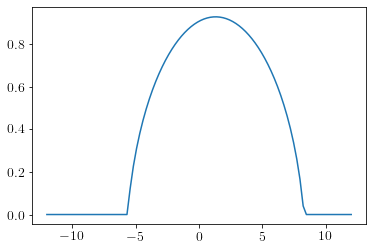

In [37]:
plt.plot(np.linspace(-12,12,96), solar_levels[10*96:11*96])

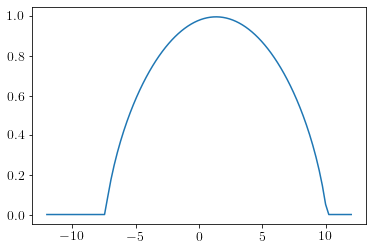

In [38]:
plt.plot(np.linspace(-12,12,96), solar_levels[90*96:91*96])

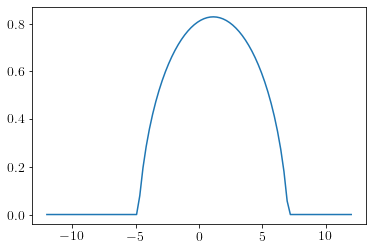

In [39]:
plt.plot(np.linspace(-12,12,96), solar_levels[180*96:181*96])

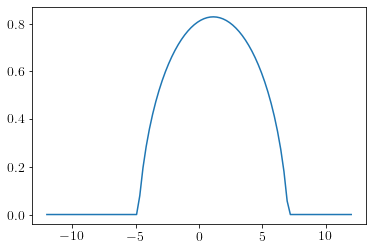

In [40]:
plt.plot(np.linspace(-12,12,96), solar_levels[180*96:181*96])

/home/jaem/anaconda3/envs/Siconos/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/home/jaem/anaconda3/envs/Siconos/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
/home/jaem/anaconda3/envs/Siconos/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use M

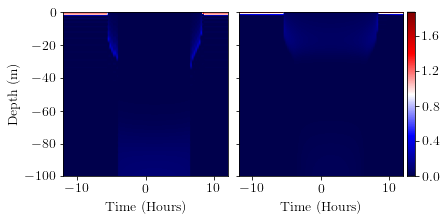

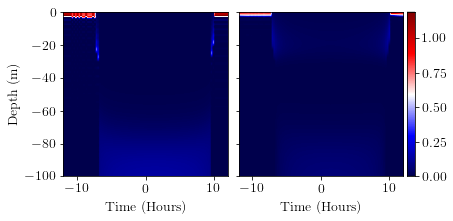

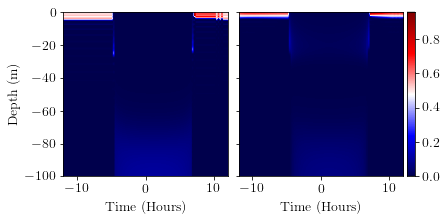

In [41]:
bigge_heatmap_plotter(10, ecos[0], strategies[0], fineness = 200, filename = "day10_nonrandom")
bigge_heatmap_plotter(90, ecos[0], strategies[0], fineness = 200, filename = "day90_nonrandom")
bigge_heatmap_plotter(180, ecos[0], strategies[0], fineness = 200, filename = "day180_nonrandom")

/home/jaem/anaconda3/envs/Siconos/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


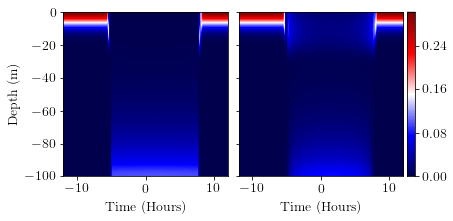

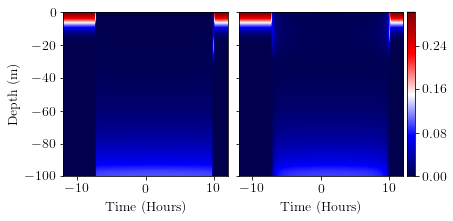

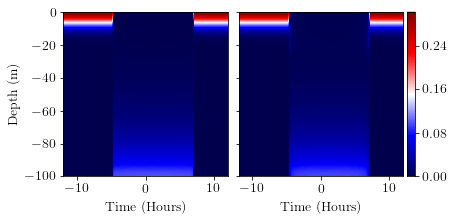

In [42]:
bigge_heatmap_plotter(10, ecos[1], strategies[1], fineness = 200, filename = "day10_semirandom")
bigge_heatmap_plotter(90, ecos[1], strategies[1], fineness = 200, filename = "day90_semirandom")
bigge_heatmap_plotter(180, ecos[1], strategies[1], fineness = 200, filename = "day180_semirandom")

In [43]:
def short_term_plotter(day, eco, populations):
    day_interval = 96
    day = int(day*day_interval)
    time_step = 1/day_interval
    eco_params_orig = ecosystem_parameters(eco.parameters.mass_vector, eco.spectral)
    OG_layered_attack = eco_params_orig.layered_attack.copy()
    flows = np.zeros((day_interval, 2))

    flows_more_res = np.zeros((day_interval, 2))

    #for i in range(day, day+day_interval):
    #    layered_attack = periodic_layers[i-day]
    #    T_G = graph_builder(eco, layered_attack = layered_attack, 
    #                  populations=populations[i], resources = resources[i], 
    #                  strategies = strategies[i])
    #    flows[i-(day), 0] = T_G[1,0]
    #    flows[i-(day), 1] = T_G[2,1]
    #    TG_M_R = graph_builder(eco, layered_attack = layered_attack, 
    #                  populations=populations_more_resources[i], resources = resources_more_resources[i], 
    #                  strategies = strategies_more_resources[i])
    #    
    #    flows_more_res[i-(day), 0] = T_G[1,0]
    #    flows_more_res[i-(day), 1] = T_G[2,1]


    fig, ax = plt.subplots(2, 2, sharex='col', sharey = 'row')
    fig.set_size_inches((16/2.54, 16/2.54))

    ax[0,1].plot(np.linspace(-12,12,day_interval), (populations[day:day+day_interval,0] - populations[day,0])/populations[day,0], color = tableau20[0], label = '20g fish')
    ax[0,1].plot(np.linspace(-12,12,day_interval), (populations[day:day+day_interval,1] - populations[day,1])/populations[day,1], color = tableau20[6], label = '8000g fish')


    ax[1, 0].set_ylabel('Production')
    ax[0, 0].set_ylabel('$\Delta$ Population/Total')
    ax[-1,0].set_xlabel("Hours")
    ax[1,-1].set_xlabel("Hours")
    ax[1,-1].set_xlim((-12,12))

    plt.savefig("pop_dyn_cons_short.png")

In [44]:
new_spectral_obj = spectral_method(30, 120, segments = 1)

In [45]:
for i in range(day,day+day_interval):
    plt.figure(figsize=(4,4))
    plt.title("Sunlight:" + str(1/2*(1+min(max((2+1)*np.cos(i*2*np.pi/day_interval), -1), 1))))
    plt.plot(eco.spectral.x*3.3, np.diff(np.cumsum(eco.spectral.M @ (strategies[i][0]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'blue')
    plt.plot(eco.spectral.x*3.3, np.diff(np.cumsum(eco.spectral.M @ (strategies[i][1]@eco.heat_kernels[0])), prepend = np.array([0])), color = 'red')
    plt.plot(eco.spectral.x*3.3,  np.diff(np.cumsum(eco.spectral.M @ resources[i]) , append = np.array([0])))
    plt.ylim((0,1))
    plt.savefig("images/images" + str(i) +".jpg")

    plt.close()

NameError: name 'day_interval' is not defined

In [ ]:
with imgio.get_writer(gif_path, mode='I', fps = 5) as writer:
    for i in range(day, day+day_interval):
        writer.append_data(imgio.imread(frames_path.format(i=i)))

In [ ]:
LD_LA = np.zeros((eco.spectral.n, m_a))
for i in range(day,day+day_interval):
    LD_LA[:, i-(day)] = periodic_layers[i-(day)][:,1,0]
heatmap_plotter([LD_LA], "heatmaps_LA", [0, 24, -100, 0])

In [ ]:
plt.plot(np.log10(np.sum(np.array(resources) @ eco.spectral.M, axis = 1)))

In [ ]:
plt.plot(eco.water.res_counts)

In [ ]:
np.sum(theoretical_max @ eco.spectral.M)